In [47]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
# Load the dataset 
df = pd.read_csv('/Users/nishthatiwari/Desktop/cognifyz/Dataset .csv')

In [49]:
# Step 1: Preprocess the Dataset

# Handling missing values
# Fill numerical missing values with mean
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].apply(lambda col: col.fillna(col.mean()))


In [50]:
# Fill categorical missing values with mode
categorical_cols = df.select_dtypes(include=[object]).columns
df[categorical_cols] = df[categorical_cols].apply(lambda col: col.fillna(col.mode()[0]))

In [51]:
# Encoding categorical variables
categorical_cols = ['Country Code', 'City', 'Cuisines', 'Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu', 'Rating color', 'Rating text']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [52]:
# Splitting the data
X = df.drop(['Aggregate rating', 'Restaurant ID', 'Restaurant Name', 'Address', 'Locality', 'Locality Verbose'], axis=1)  # Features
y = df['Aggregate rating']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
# Step 2: Select a Regression Algorithm and Train the Model

# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Decision Tree Regression
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [54]:
# Step 3: Evaluate the Model

# Predictions
linear_pred = linear_model.predict(X_test)
tree_pred = tree_model.predict(X_test)


In [55]:
# Metrics
linear_mse = mean_squared_error(y_test, linear_pred)
linear_r2 = r2_score(y_test, linear_pred)

tree_mse = mean_squared_error(y_test, tree_pred)
tree_r2 = r2_score(y_test, tree_pred)

print(f"Linear Regression - MSE: {linear_mse}, R-squared: {linear_r2}")
print(f"Decision Tree Regression - MSE: {tree_mse}, R-squared: {tree_r2}")

Linear Regression - MSE: 0.034889406191294575, R-squared: 0.9846714694507882
Decision Tree Regression - MSE: 0.054840397697540545, R-squared: 0.9759060757059425


In [56]:
# Feature Importance for Decision Tree
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': tree_model.feature_importances_})
feature_importances = feature_importances.sort_values('importance', ascending=False)



/var/folders/xn/9kqsj1r90r3dg2z92hcg5tn80000gn/T/ipykernel_931/2842557771.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=important_features, palette="viridis")


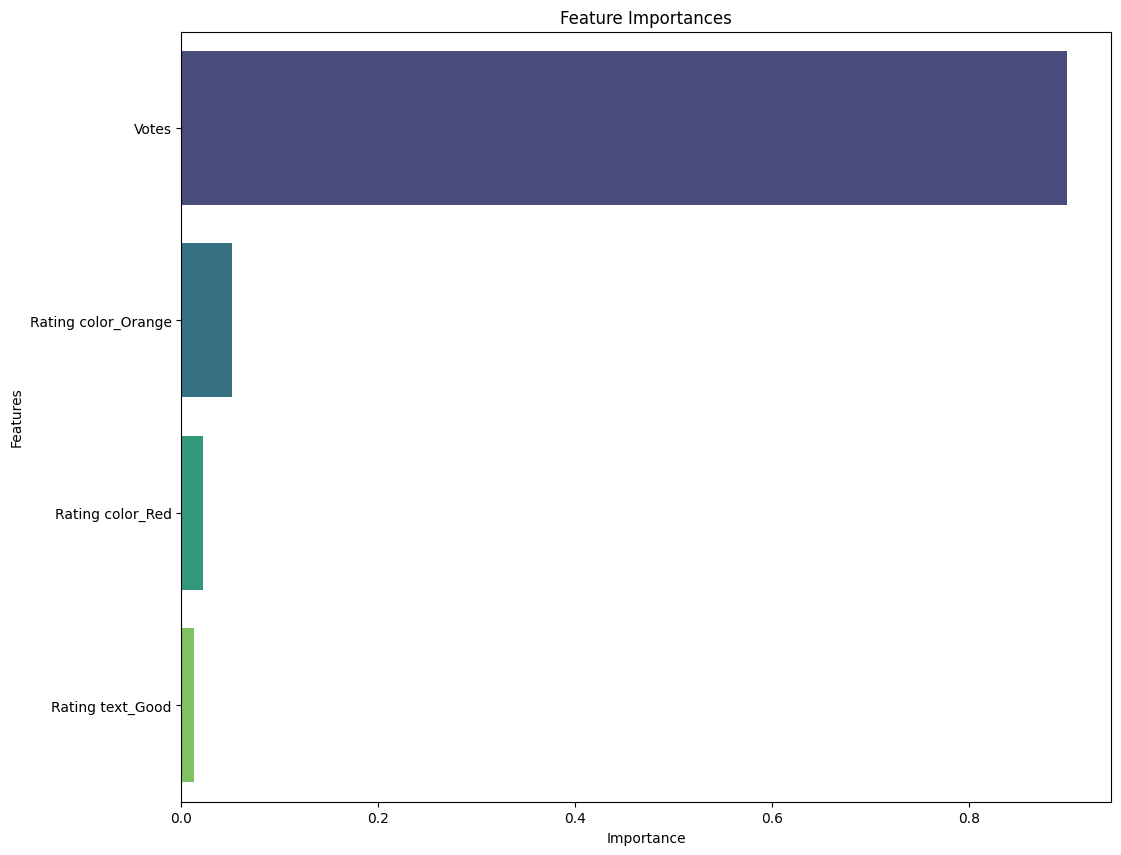

In [57]:
# Set a threshold to filter out features with very low importance
importance_threshold = 0.01  # You can adjust this threshold as needed
important_features = feature_importances[feature_importances['importance'] > importance_threshold]

# Sort by importance again just in case
important_features = important_features.sort_values('importance', ascending=False)

plt.figure(figsize=(12, 10))  # Increased the height for better readability
sns.barplot(x='importance', y='feature', data=important_features, palette="viridis")

plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')

plt.show()
